# 🐄 **Análisis de la producción lechera en granjas españolas** 🐄
**Desentrañando los factores clave que determinan el rendimiento de las granjas lácteas.**

En un sector tan competitivo como la producción de leche, ¿qué hace que algunas granjas sean más rentables que otras? ¿Es el número de vacas, la cantidad de tierra, la mano de obra, o la alimentación lo que marca la diferencia? En este análisis, intentaremos descifrar cómo estos factores afectan la producción de leche y cuál es la influencia real de cada uno en el rendimiento de las granjas. Usaremos datos reales de granjas españolas, con registros de varios años, para entender mejor el comportamiento de las variables que afectan a esta industria.

## 1️⃣ **Objetivo**

Nuestro objetivo es explorar la relación entre las variables de entrada (como vacas, tierra, trabajo, y alimentación) y la producción de leche en granjas españolas. Usaremos el conjunto de datos de producción lechera para obtener un modelo econométrico que nos permita entender cómo estos factores afectan el rendimiento de las granjas, y qué variables tienen mayor influencia.

## 2️⃣ **¿Por qué es importante esto?**

La rentabilidad de las granjas lecheras es crucial tanto para los agricultores como para los consumidores. Los agricultores deben optimizar sus operaciones para maximizar la producción y minimizar los costos, mientras que los consumidores se benefician de precios más accesibles. Este análisis puede ofrecer recomendaciones valiosas para la industria lechera y ayudar a mejorar la eficiencia en la producción de leche.

## 3️⃣ **Variables a considerar**

Las variables presentes en el conjunto de datos son las siguientes:

**Entradas:**
- **COWS:** Número de vacas en la granja.
- **X1 (log de las desviaciones de las vacas respecto a las medias):** Relacionado con el comportamiento de las vacas y su impacto en la producción.
- **LAND (log de las desviaciones respecto a las medias de la tierra):** Medida de la cantidad de terreno disponible.
- **LABOR (log de las desviaciones respecto a las medias de la mano de obra):** Número de trabajadores en la granja.
- **FEED (log de las desviaciones respecto a las medias de la alimentación):** Tipo y cantidad de alimentación proporcionada.

**Términos Translog (variables cuadráticas y de productos cruzados):**
- **X11, X22, X33, X44, X12, X13, X14, X23, X24, X34:** Estas variables ayudan a capturar las interacciones no lineales entre las variables de entrada.

**Variables dummy de año:**
- **YEAR93, YEAR94, ..., YEAR98:** Variables que indican el año de observación, permitiendo capturar efectos temporales.

**Salida:**
- **MILK:** La producción total de leche de cada granja.
- **YIT (log de la producción de leche):** El logaritmo de la producción de leche para transformar la relación lineal.

## 4️⃣ **Metodología**

1. **Datos de Panel**: Dado que tenemos datos de varias granjas a lo largo de varios años (N = 247, T = 6), el modelo adecuado para este análisis es un modelo de **panel**. Esto nos permitirá capturar tanto las variaciones a nivel de granja como las variaciones temporales.

2. **Regresión de Panel**: Usaremos una regresión de panel para analizar cómo las variables de entrada y los efectos del año influyen en la producción de leche. Además, probaremos con efectos fijos y aleatorios para ver qué tipo de especificación se ajusta mejor a los datos.

3. **Multicolinealidad**: Antes de realizar la regresión, verificaremos si existe multicolinealidad entre las variables de entrada, usando el índice de **VIF** (Factor de Inflación de la Varianza).

4. **Ajustes adicionales**: Si encontramos problemas de multicolinealidad, ajustaremos el modelo eliminando o transformando variables que causen redundancia.

In [1]:
import os
os.chdir('/Applications/Stata/utilities')
from pystata import config
config.init('se')

%stata import delimited "/Users/danteschrantz/Desktop/UNAV/2024-2025/Modeling Trabajo Final/dairy.csv"


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Single-user , expiring 25 Nov 2024
Serial number: 401809408832
  Licensed to: Dante Schrantz
               Universidad de Navarra

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.
(encoding automatically selected: ISO-8859-1)
(28 vars, 1,482 obs)


#### **Fuentes de Datos**
Los datos utilizados provienen de un conjunto de datos sobre la producción lechera en granjas españolas, el cual se obtiene de diversas fuentes públicas y bases de datos agrícolas españolas. Los detalles específicos sobre las fuentes de los datos pueden ser consultados en el sitio web oficial de las instituciones que recopilan y mantienen estos registros. 

#### **Notas Adicionales**
- **Verificación de datos temporales**: El conjunto de datos incluye variables de tiempo (`year`), permitiendo análisis de series temporales sobre la evolución de la producción de leche en las granjas.
- **Variables de interés**: Las variables como `cows`, `land`, y `milk` son esenciales para evaluar la productividad y la eficiencia de las granjas lecheras, permitiendo realizar un análisis detallado sobre las relaciones entre recursos y producción.

In [2]:
%stata summarize



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        farm |      1,482         124    71.32624          1        247
        year |      1,482        95.5    1.708402         93         98
        cows |      1,482    22.11619    11.27415        4.5       82.3
        land |      1,482     12.9857    6.172051          2       45.1
        milk |      1,482    131106.6    92583.98      14410     727281
-------------+---------------------------------------------------------
       labor |      1,482    1.671997    .5527831          1          4
        feed |      1,482    57941.35    47981.24   3924.141   376731.6
         yit |      1,482    11.57749    .6434377   9.575678   13.49707
          x1 |      1,482   -1.40e-09    .4885577  -1.474623   1.431671
          x2 |      1,482    5.16e-09    .4559323  -1.767564   1.348171
-------------+-------------------------------------------------

In [3]:
%stata label variable farm "Identificador único de la granja"
%stata label variable year "Año de la observación (93-98)"
%stata label variable cows "Número de vacas en la granja"
%stata label variable land "Superficie de tierra utilizada en hectáreas"
%stata label variable labor "Horas de trabajo de los empleados"
%stata label variable feed "Cantidad de alimentación proporcionada a las vacas"
%stata label variable yit "Logaritmo de la producción de leche"
%stata label variable x1 "Deviation from the mean (log)"
%stata label variable x2 "Deviation from the mean (log)"
%stata label variable x3 "Deviation from the mean (log)"
%stata label variable x4 "Deviation from the mean (log)"
%stata label variable x11 "Square of X1"
%stata label variable x22 "Square of X2"
%stata label variable x33 "Square of X3"
%stata label variable x44 "Square of X4"
%stata label variable x12 "Cross-product of X1 and X2"
%stata label variable x13 "Cross-product of X1 and X3"
%stata label variable x14 "Cross-product of X1 and X4"
%stata label variable x23 "Cross-product of X2 and X3"
%stata label variable x24 "Cross-product of X2 and X4"
%stata label variable x34 "Cross-product of X3 and X4"
%stata label variable year93 "Dummy variable for year 1993"
%stata label variable year94 "Dummy variable for year 1994"
%stata label variable year95 "Dummy variable for year 1995"
%stata label variable year96 "Dummy variable for year 1996"
%stata label variable year97 "Dummy variable for year 1997"
%stata label variable year98 "Dummy variable for year 1998"

In [4]:
%stata describe


Contains data
 Observations:         1,482                  
    Variables:            28                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
farm            int     %8.0g                 Identificador único de la granja
year            byte    %8.0g                 Año de la observación (93-98)
cows            float   %9.0g                 Número de vacas en la granja
land            float   %9.0g                 Superficie de tierra utilizada en
                                                hectáreas
milk            long    %12.0g                MILK
labor           float   %9.0g                 Horas de trabajo de los empleados
feed            float   %9.0g                 Cantidad de alimentación
                                                proporciona

In [5]:
%stata misstable summarize

(variables nonmissing or string)


(bin=20, start=4.5, width=3.8900002)


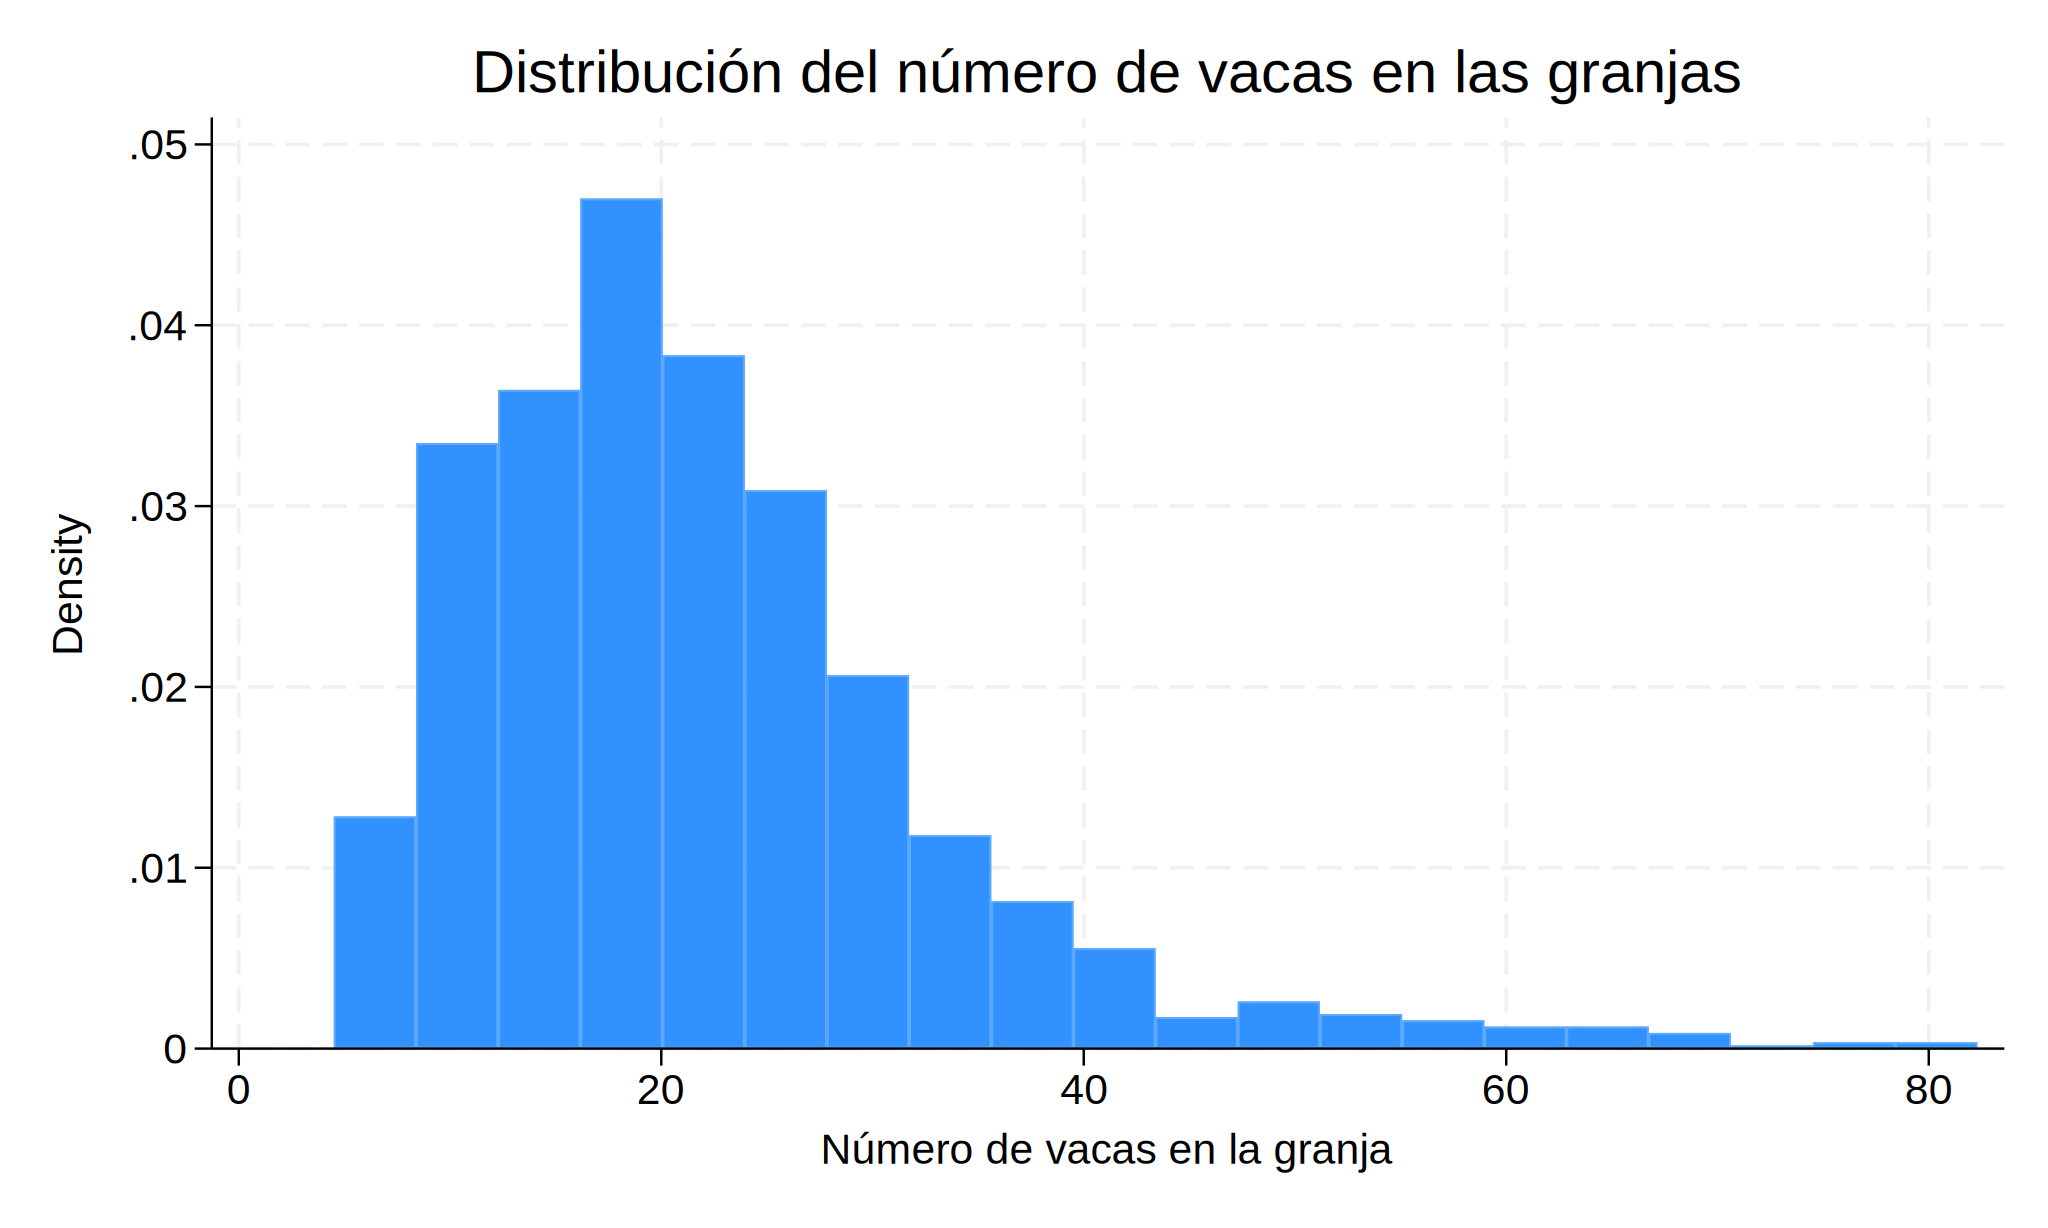

(bin=20, start=2, width=2.1549999)


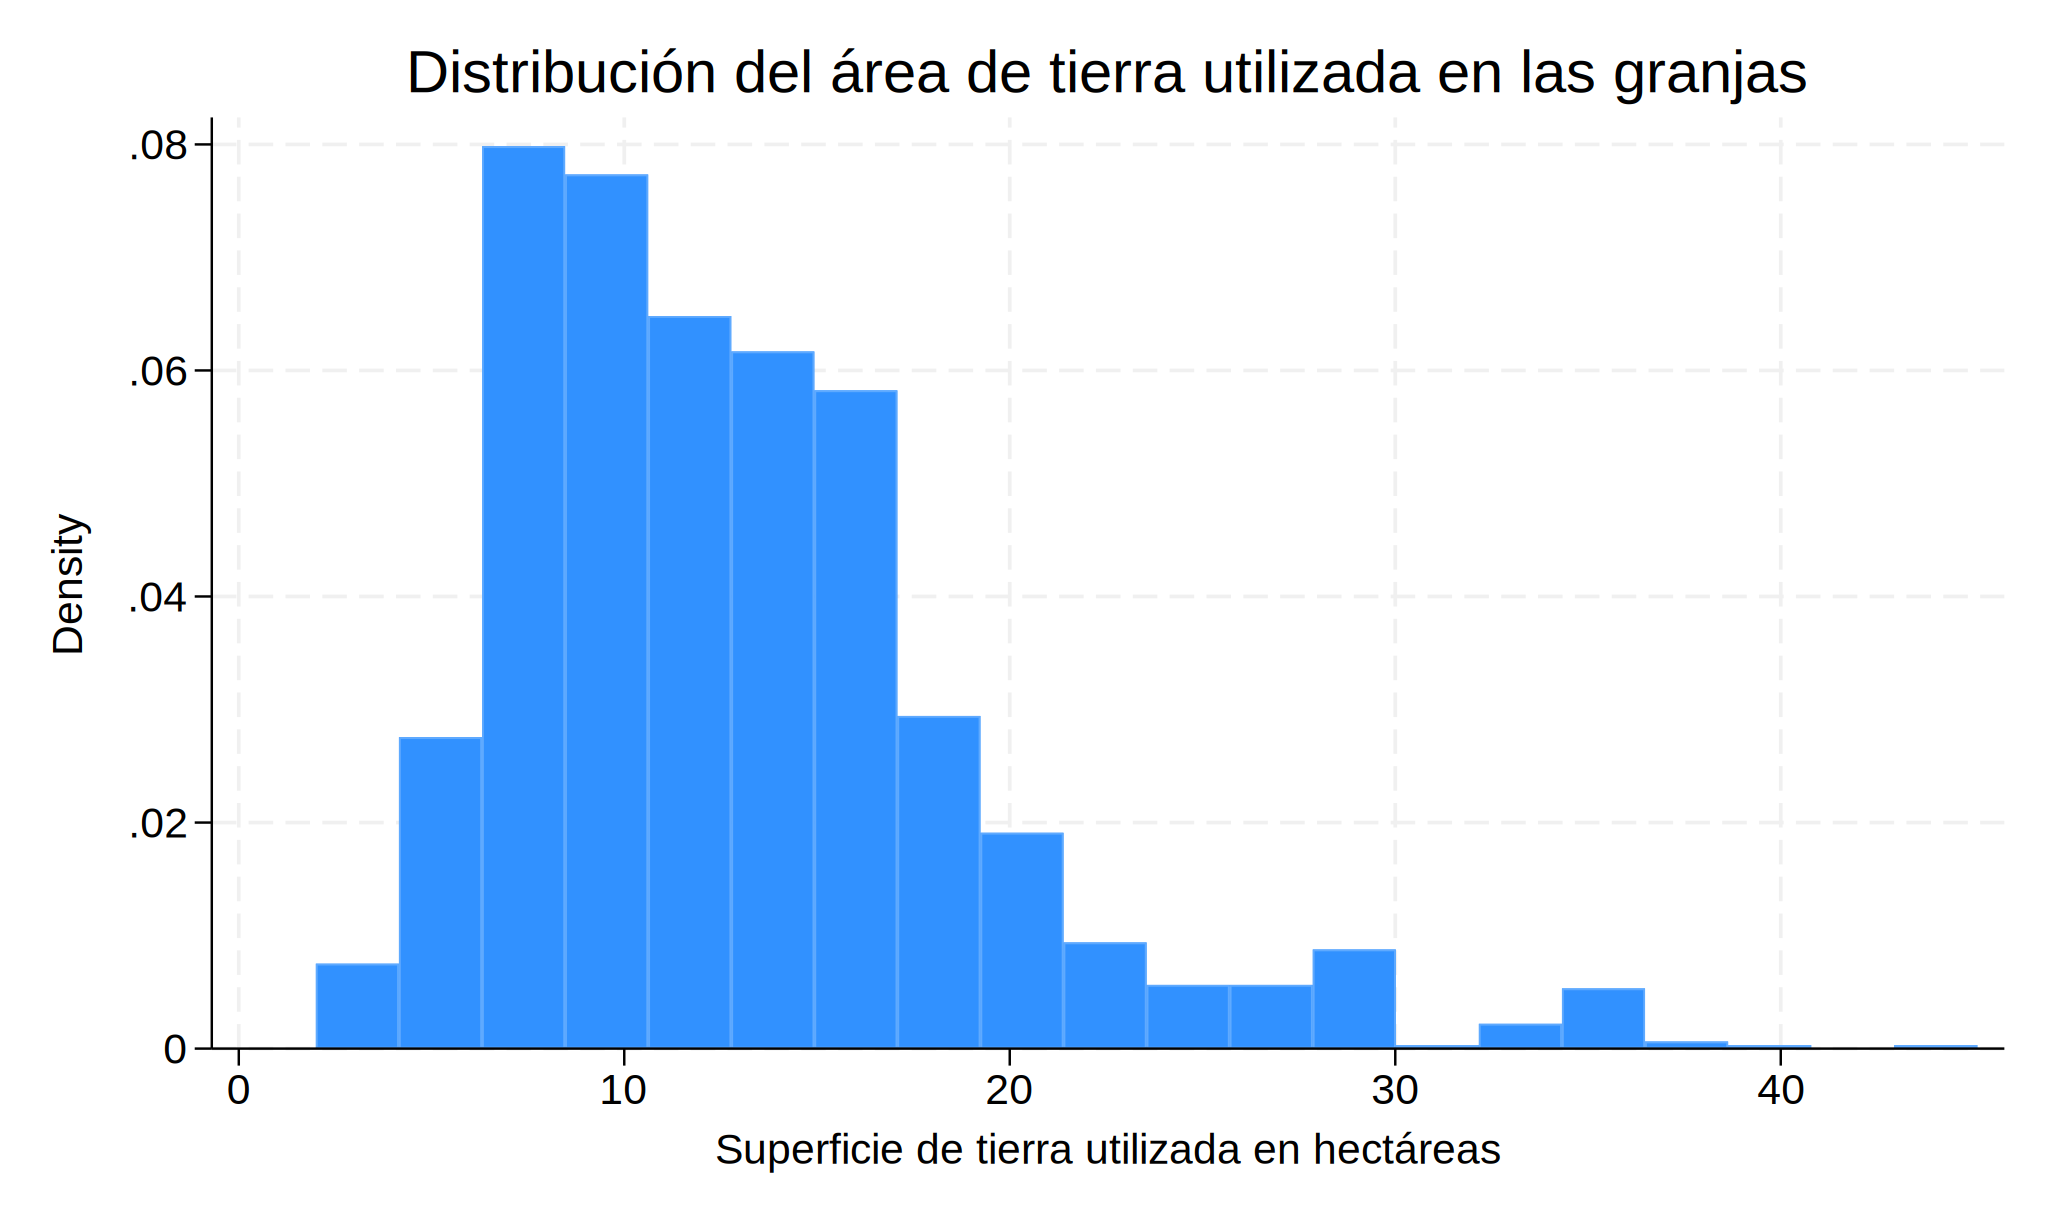

(bin=20, start=1, width=.15)


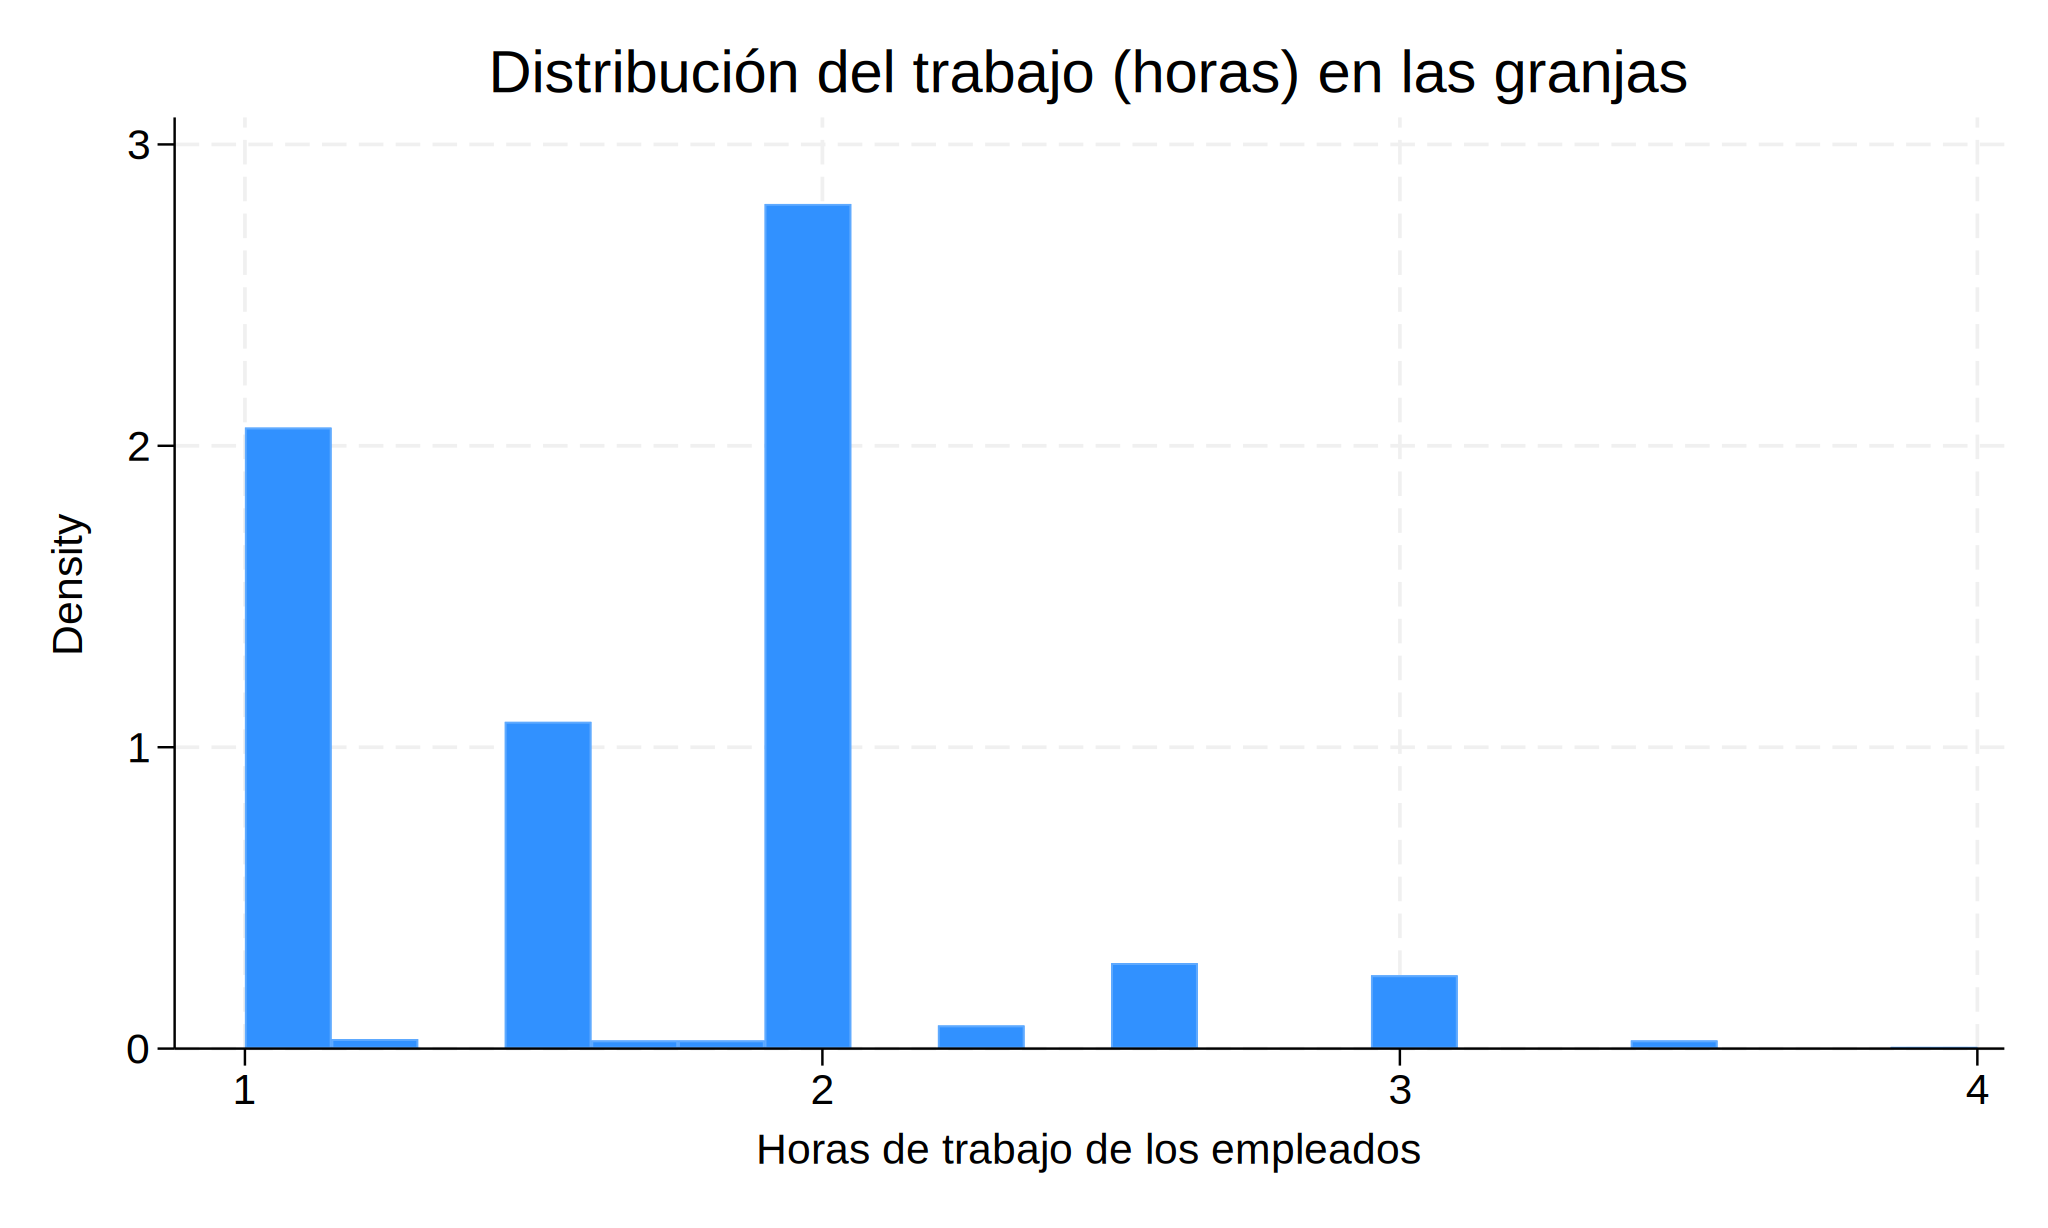

(bin=20, start=3924.1411, width=18640.371)


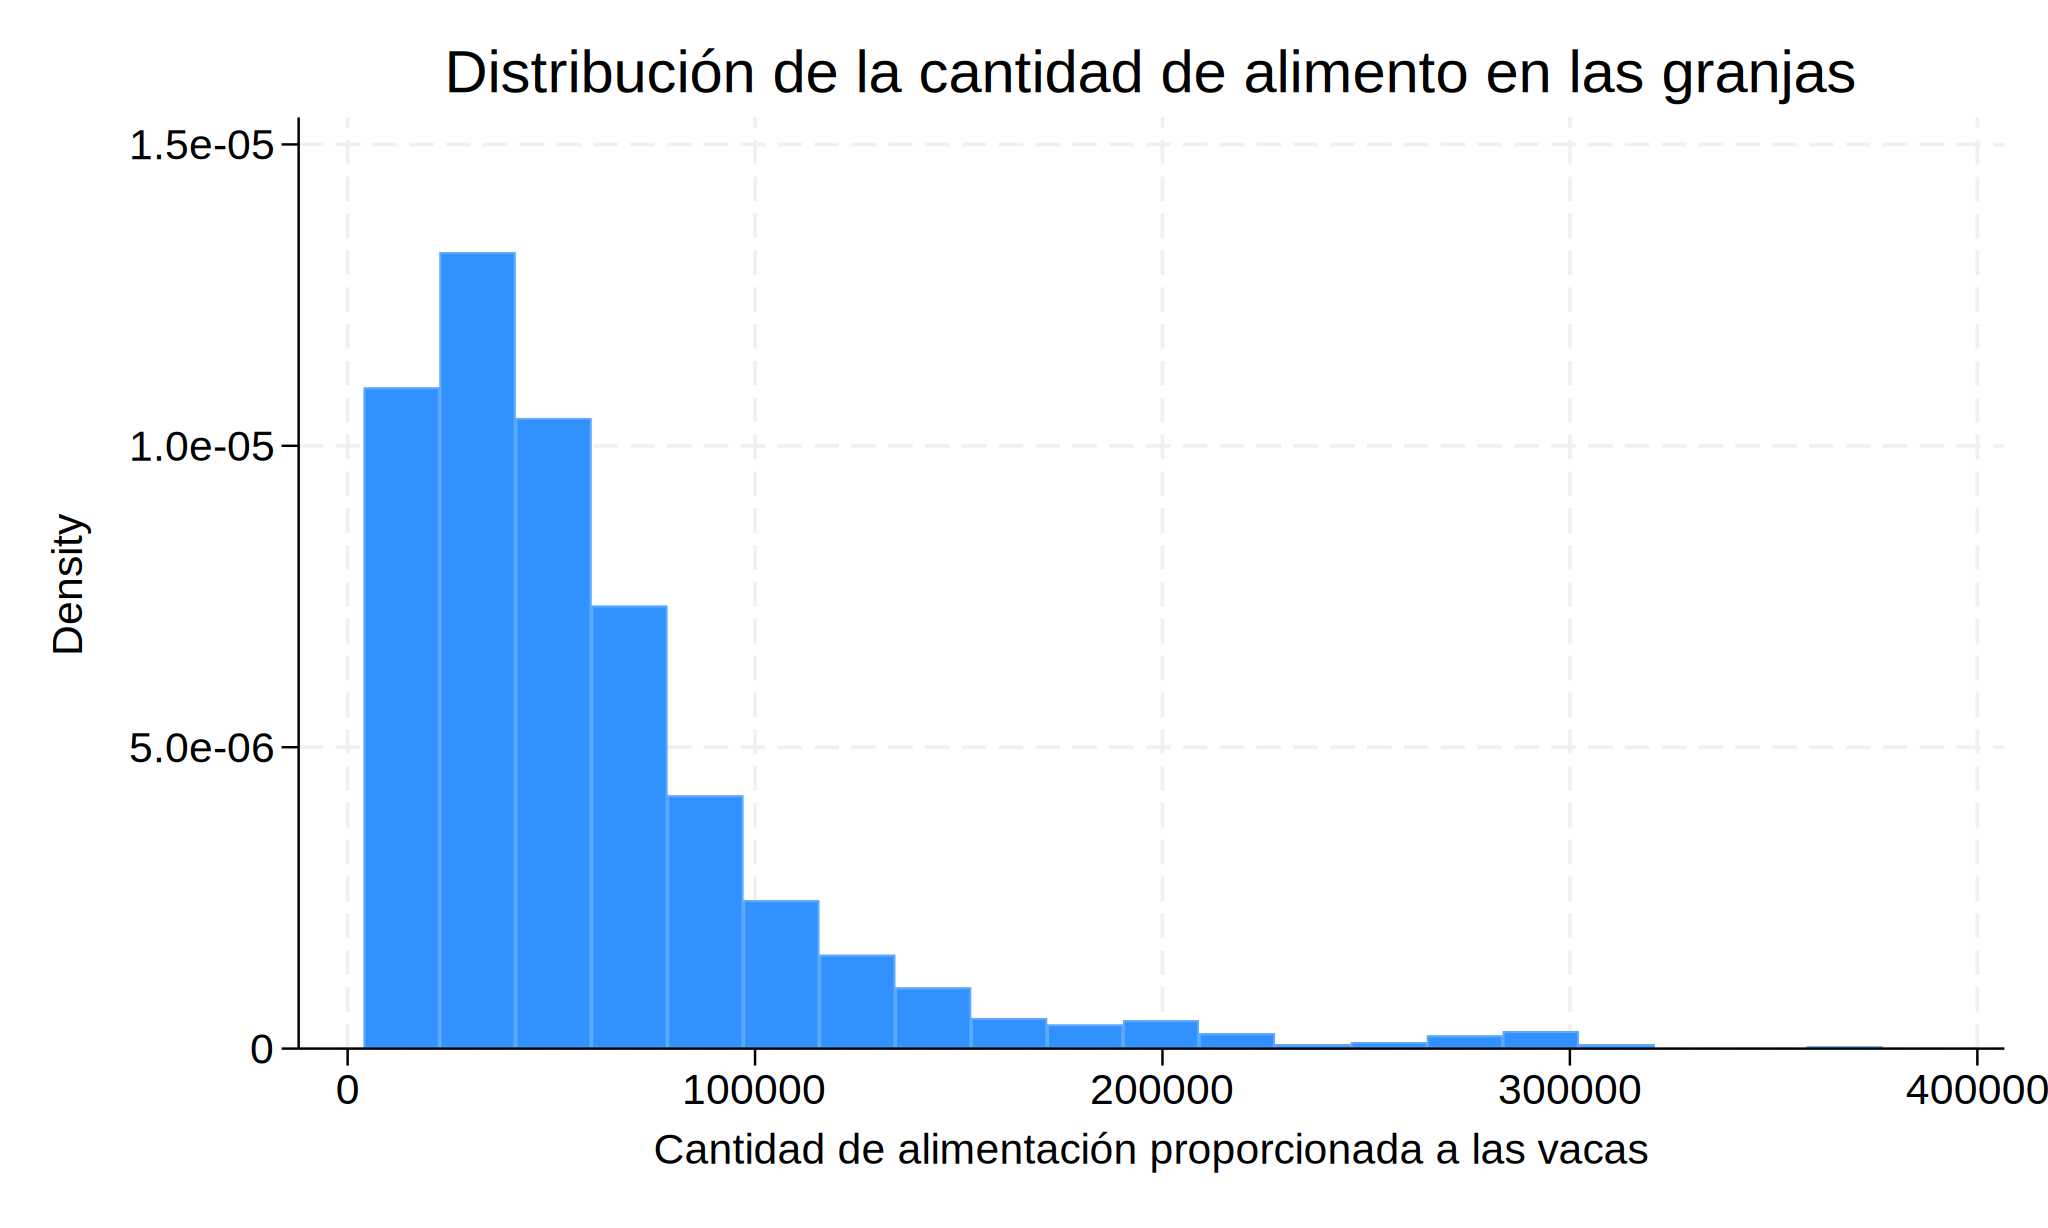

In [6]:
%stata histogram cows, bin(20) title("Distribución del número de vacas en las granjas") xlabel(, grid) ylabel(, grid)
%stata histogram land, bin(20) title("Distribución del área de tierra utilizada en las granjas") xlabel(, grid) ylabel(, grid)
%stata histogram labor, bin(20) title("Distribución del trabajo (horas) en las granjas") xlabel(, grid) ylabel(, grid)
%stata histogram feed, bin(20) title("Distribución de la cantidad de alimento en las granjas") xlabel(, grid) ylabel(, grid)

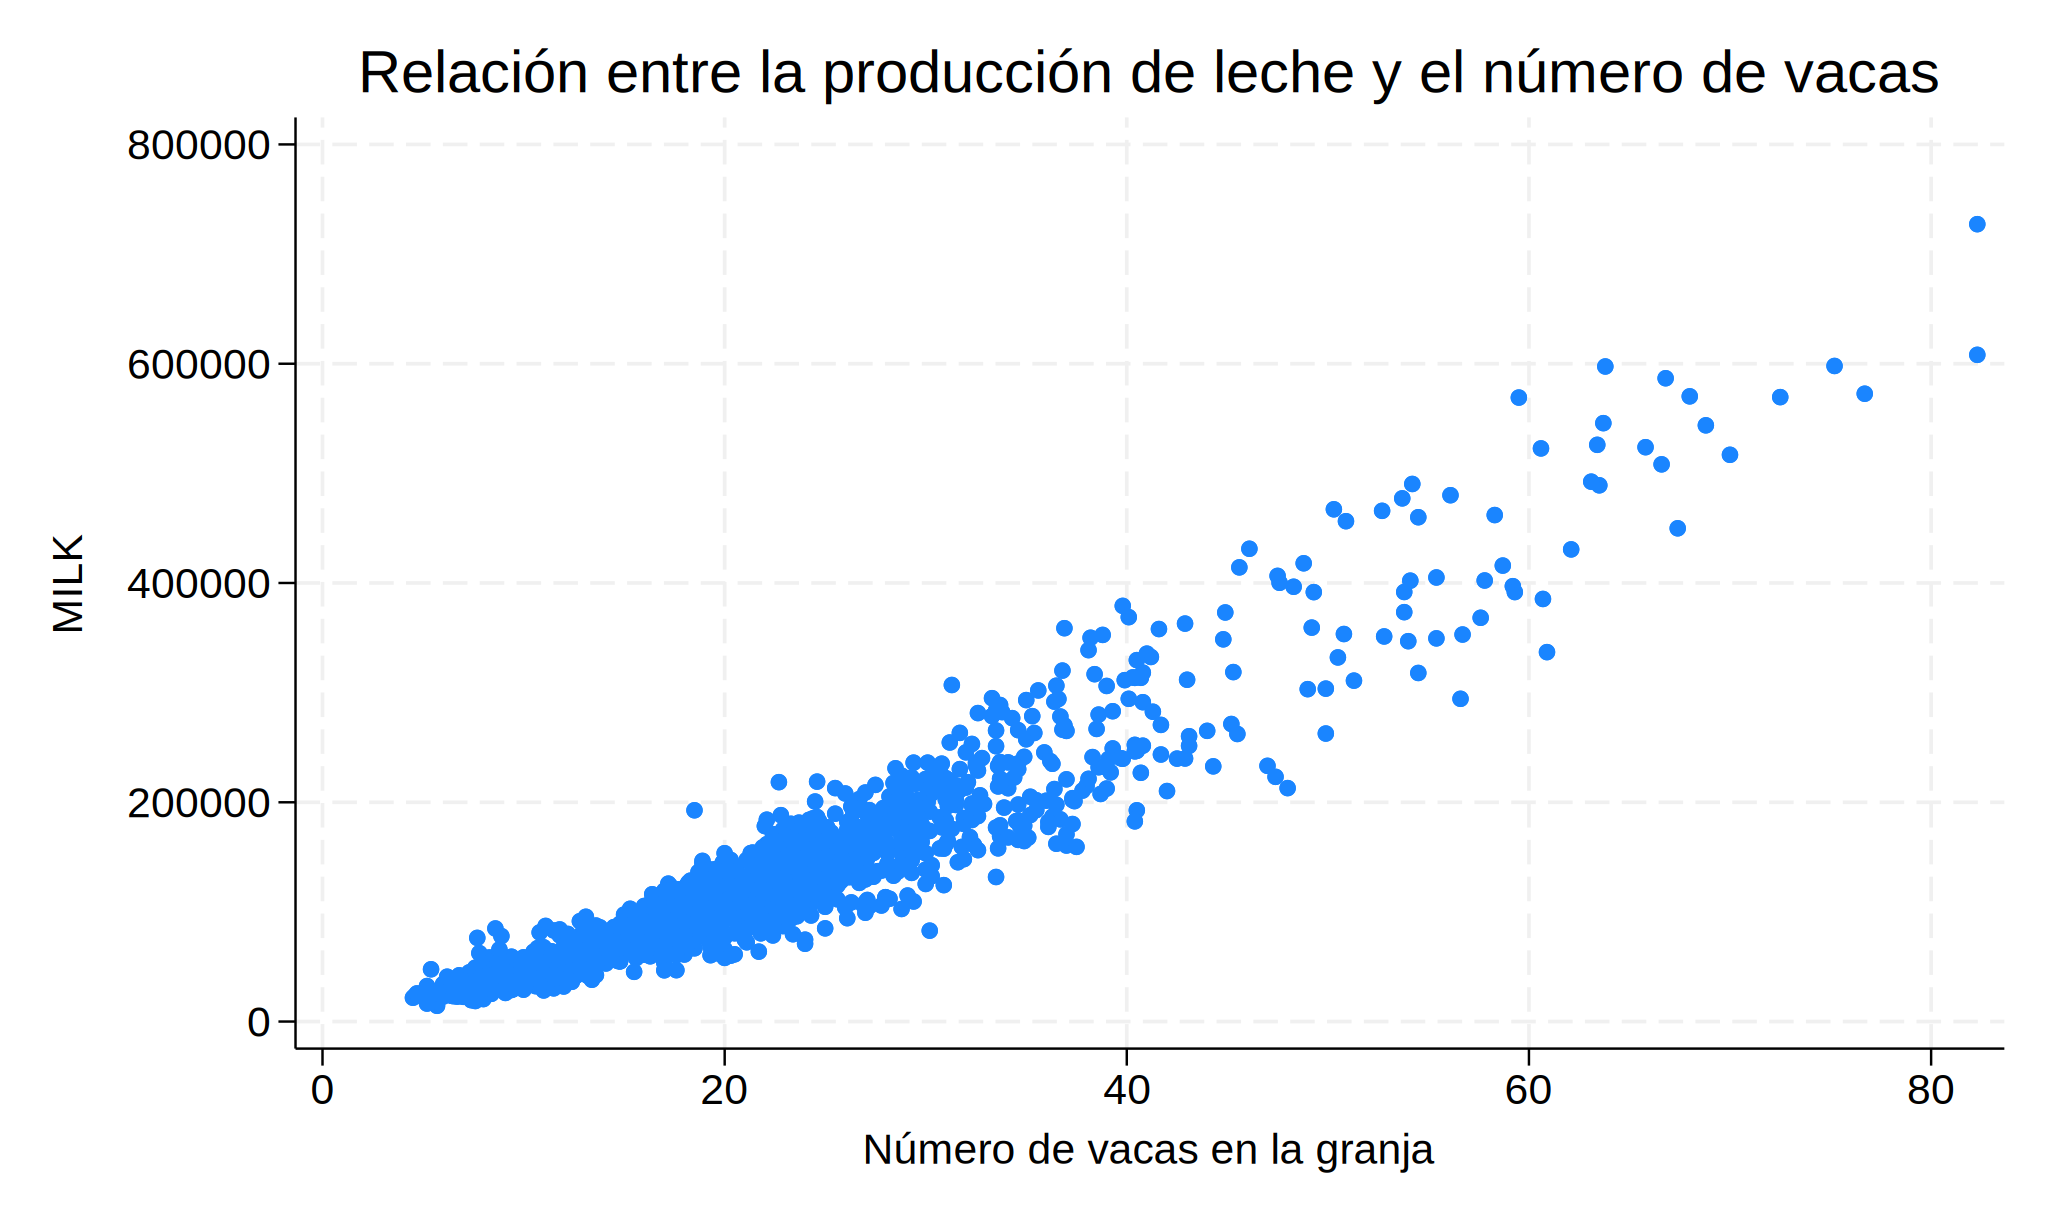

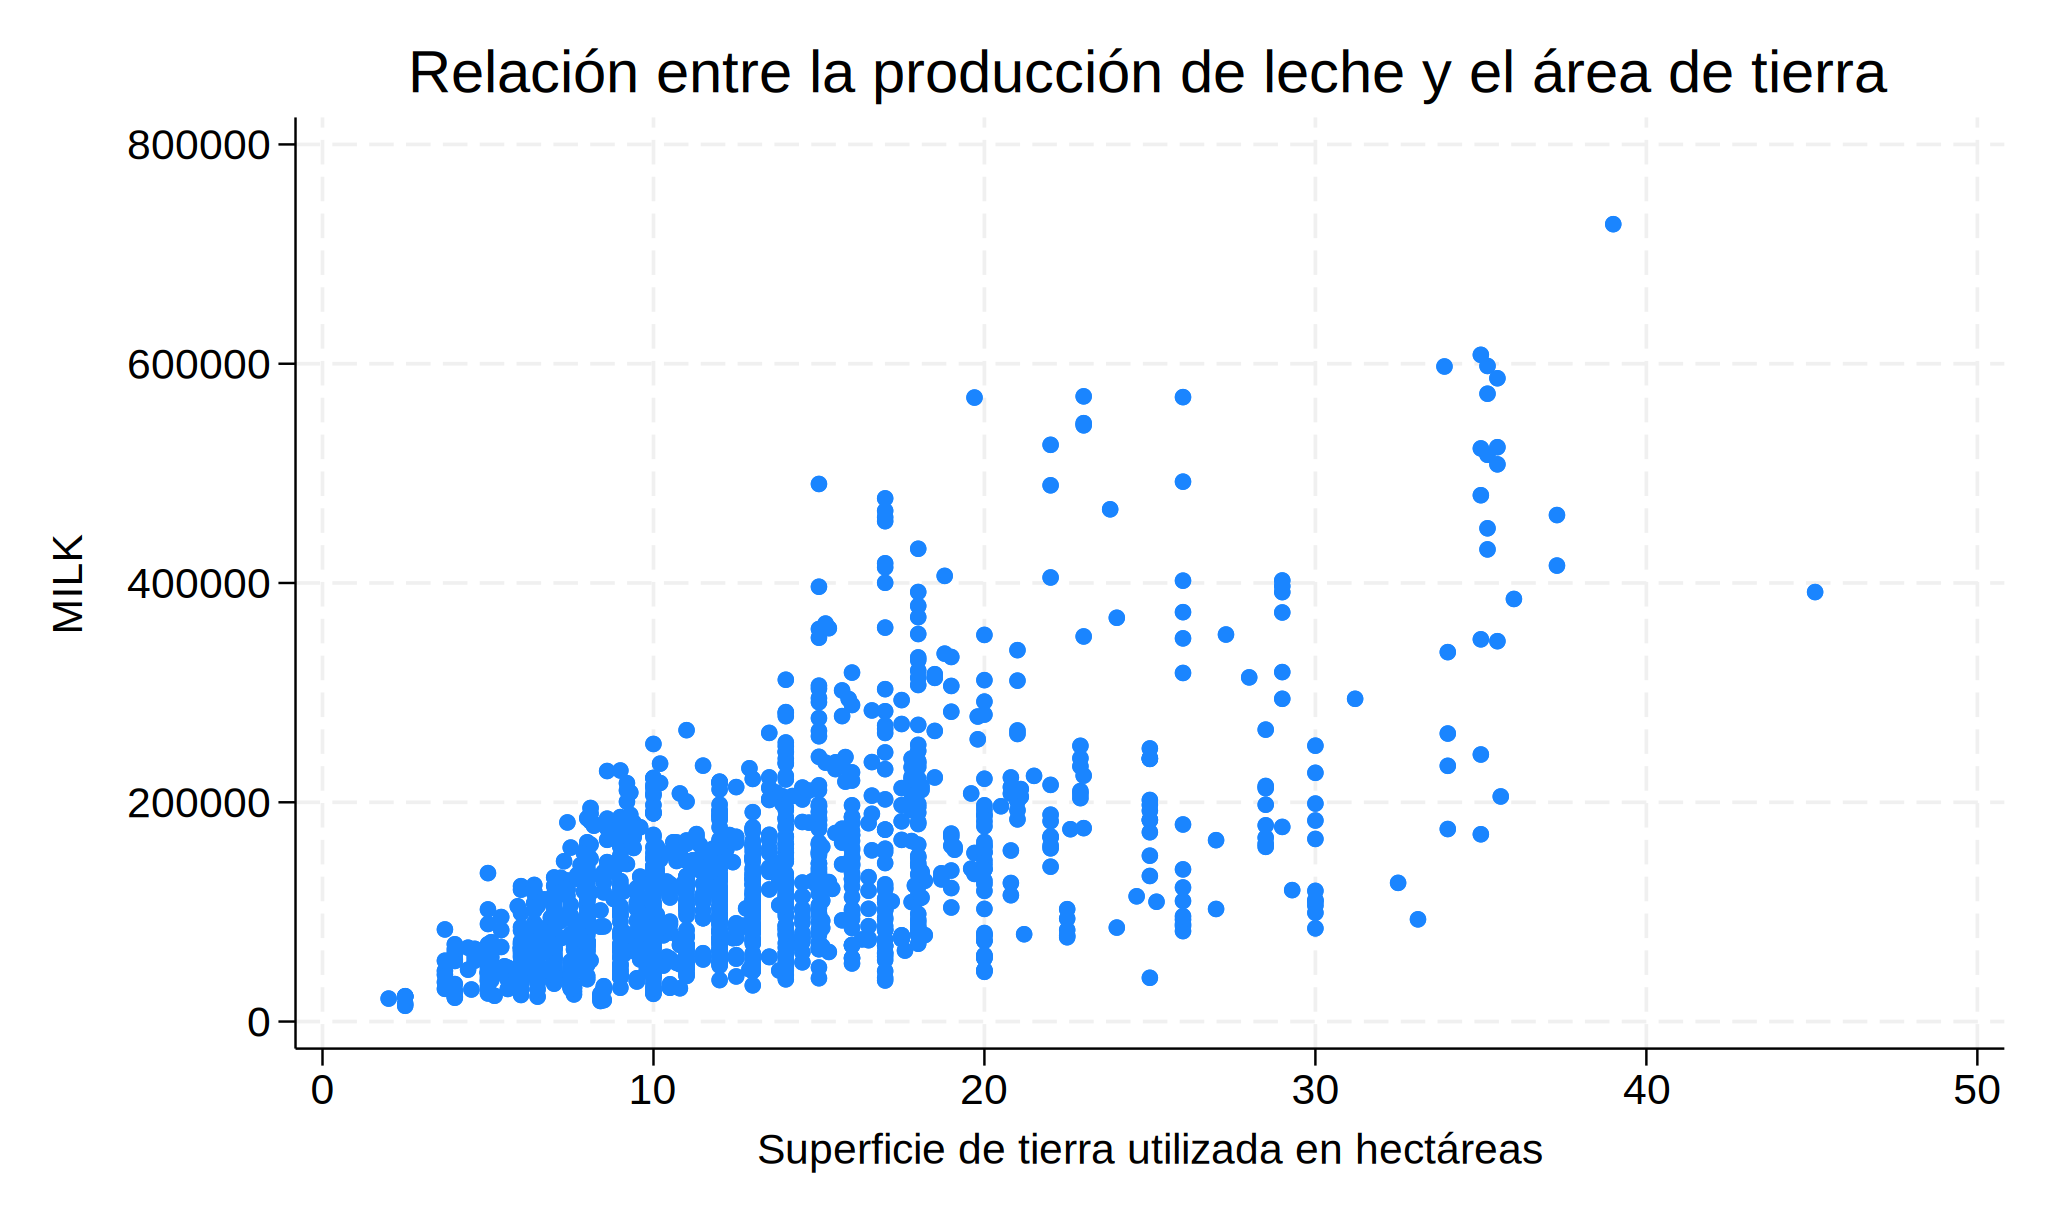

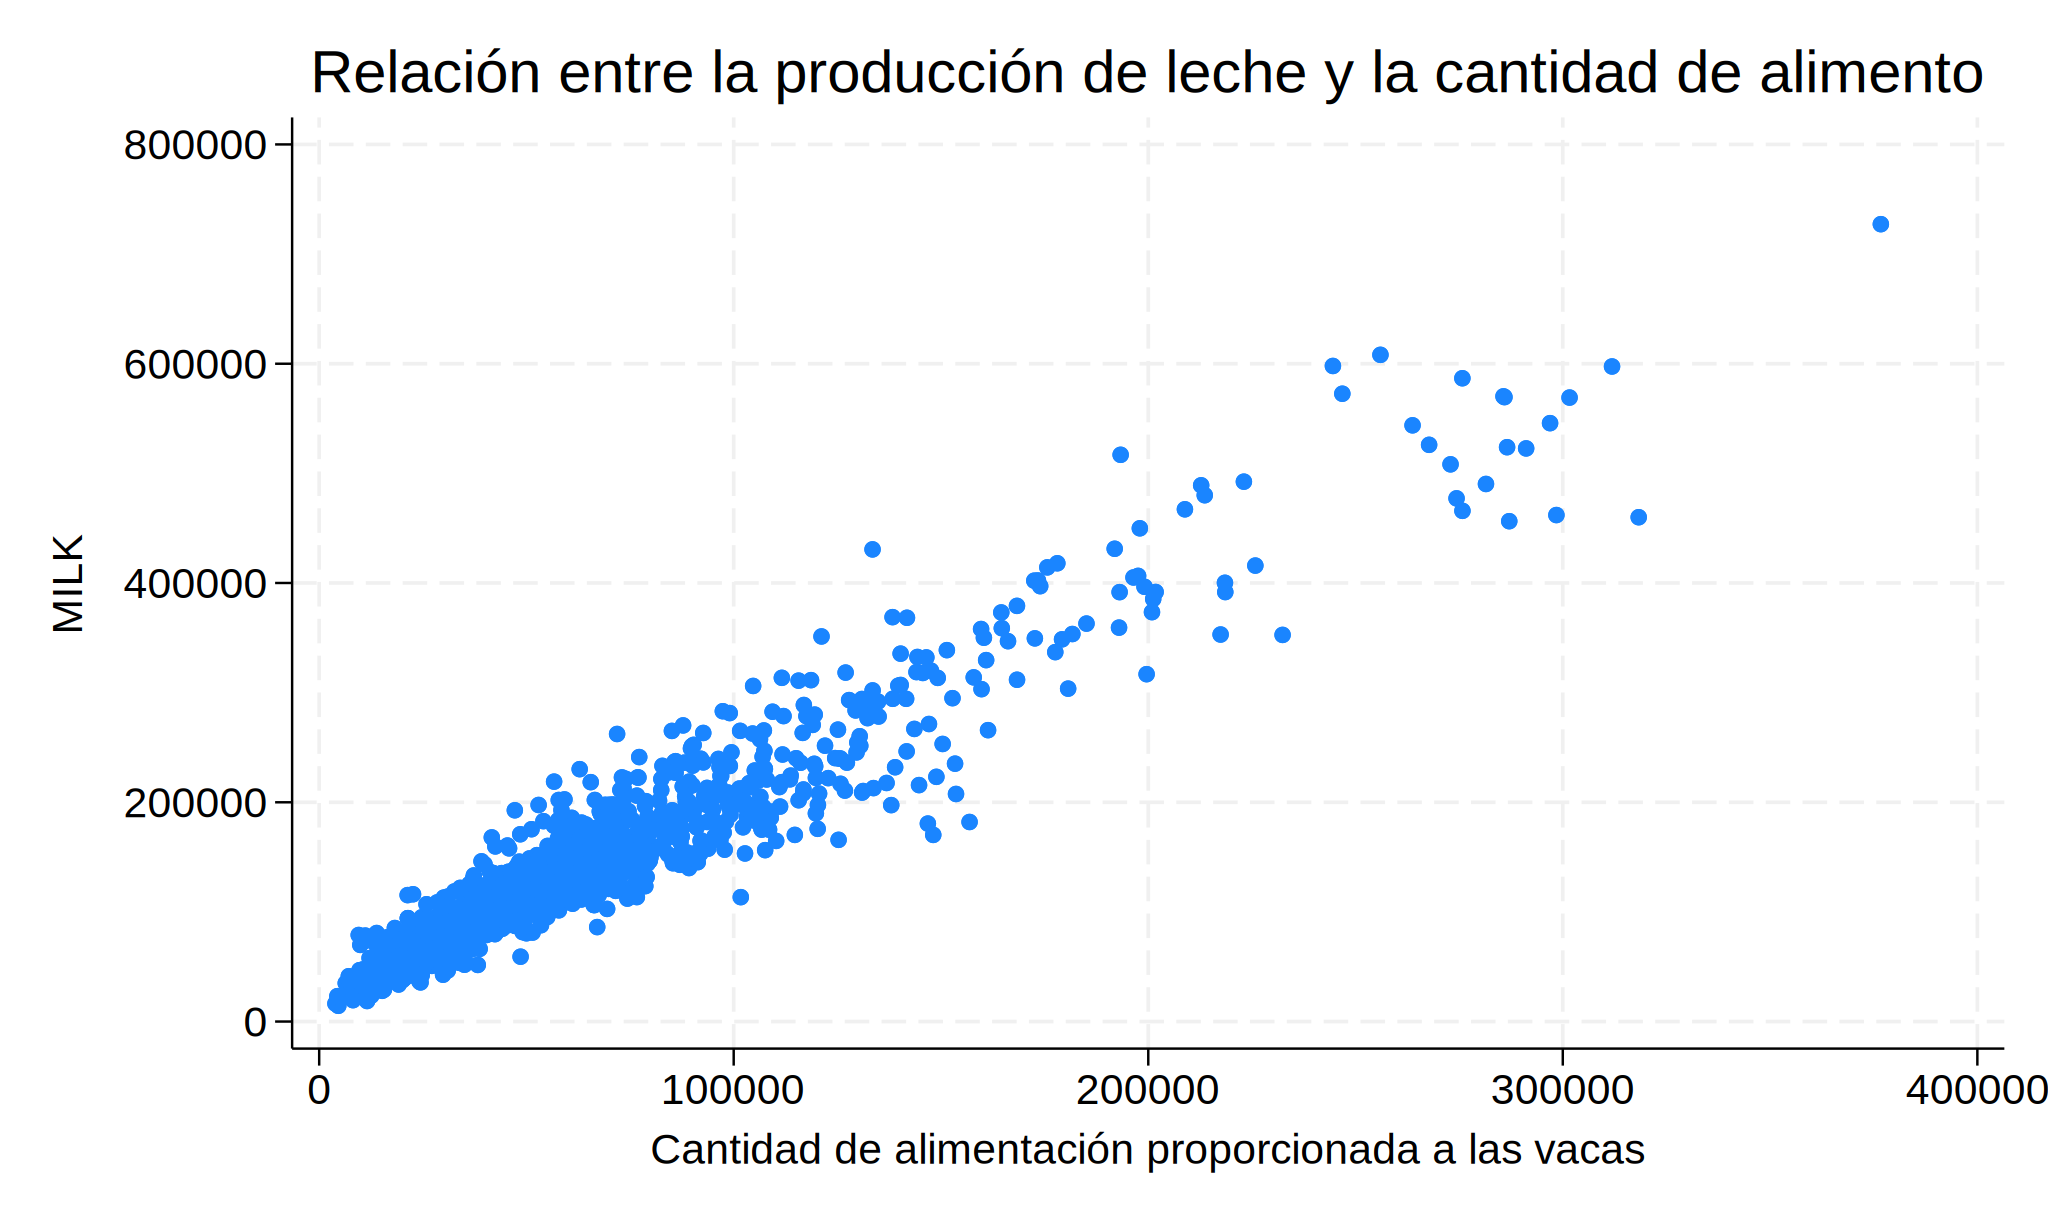

In [7]:
%stata scatter milk cows, title("Relación entre la producción de leche y el número de vacas")
%stata scatter milk land, title("Relación entre la producción de leche y el área de tierra")
%stata scatter milk feed, title("Relación entre la producción de leche y la cantidad de alimento")

In [8]:
%stata cor milk cows land labor feed, means
%stata sum milk cows land labor feed

(obs=1,482)

    Variable |         Mean    Std. dev.          Min          Max
-------------+----------------------------------------------------
        milk |     131106.6     92583.98        14410       727281
        cows |     22.11619     11.27415          4.5         82.3
        land |      12.9857     6.172051            2         45.1
       labor |     1.671997     .5527831            1            4
        feed |     57941.35     47981.24     3924.141     376731.6


             |     milk     cows     land    labor     feed
-------------+---------------------------------------------
        milk |   1.0000
        cows |   0.9466   1.0000
        land |   0.6228   0.7022   1.0000
       labor |   0.5403   0.5618   0.3561   1.0000
        feed |   0.9575   0.9003   0.5609   0.5059   1.0000




    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        milk |      1,482    131106.6    92583.98      14410     727281
        cows |      1,482    22.11619    11.27415        4.5       82.3
        land |      1,482     12.9857    6.172051          2       45.1
       labor |      1,482    1.671997    .5527831          1          4
        feed |      1,482    57941.35    47981.24   3924.141   376731.6


In [9]:
%stata regress milk cows land labor feed


      Source |       SS           df       MS      Number of obs   =     1,482
-------------+----------------------------------   F(4, 1477)      =   7779.62
       Model |  1.2120e+13         4  3.0299e+12   Prob > F        =    0.0000
    Residual |  5.7524e+11     1,477   389465851   R-squared       =    0.9547
-------------+----------------------------------   Adj R-squared   =    0.9546
       Total |  1.2695e+13     1,481  8.5718e+09   Root MSE        =     19735

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   3644.012    129.804    28.07   0.000     3389.392    3898.632
        land |  -58.63673   120.1844    -0.49   0.626     -294.387    177.1136
       labor |   2031.415   1123.863     1.81   0.071    -173.1226    4235.952
        feed |   1.069114   .0252323    42.37   0.

In [10]:
%stata vif


    Variable |       VIF       1/VIF  
-------------+----------------------
        cows |      8.14    0.122792
        feed |      5.57    0.179415
        land |      2.09    0.477924
       labor |      1.47    0.681362
-------------+----------------------
    Mean VIF |      4.32


El VIF mide la colinealidad entre las variables. Un VIF superior a 10 suele ser indicativo de colinealidad, pero en este caso, todos los VIFs están por debajo de 10, lo que sugiere que no hay multicolinealidad significativa entre las variables.

Cows y feed son variables claves para entender la producción de leche.
Land no tiene un impacto significativo en este modelo, y la variable labor tiene un impacto marginal.
El modelo tiene un buen ajuste (R-cuadrado = 0.9547), lo que sugiere que la regresión captura la mayoría de la variabilidad en la producción de leche, aunque se pueden hacer mejoras.

In [11]:
%stata xtset farm year


Panel variable: farm (strongly balanced)
 Time variable: year, 93 to 98
         Delta: 1 unit


In [12]:
%stata xtreg milk cows land labor feed, fe
%stata estimates store fe_model


Fixed-effects (within) regression               Number of obs     =      1,482
Group variable: farm                            Number of groups  =        247

R-squared:                                      Obs per group:
     Within  = 0.8759                                         min =          6
     Between = 0.9642                                         avg =        6.0
     Overall = 0.9536                                         max =          6

                                                F(4, 1231)        =    2172.03
corr(u_i, Xb) = -0.0685                         Prob > F          =     0.0000

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   4110.793   174.6928    23.53   0.000     3768.065    4453.522
        land |   162.0506   167.2217     0.97   0.333    -166.02

In [13]:
%stata xtreg milk cows land labor feed, re
%stata estimates store re_model


Random-effects GLS regression                   Number of obs     =      1,482
Group variable: farm                            Number of groups  =        247

R-squared:                                      Obs per group:
     Within  = 0.8757                                         min =          6
     Between = 0.9649                                         avg =        6.0
     Overall = 0.9543                                         max =          6

                                                Wald chi2(4)      =   15458.17
corr(u_i, X) = 0 (assumed)                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   3936.384   140.5181    28.01   0.000     3660.973    4211.794
        land |   42.54122    140.092     0.30   0.761    -232.03

In [14]:
%stata xttest0


Breusch and Pagan Lagrangian multiplier test for random effects

        milk[farm,t] = Xb + u[farm] + e[farm,t]

        Estimated results:
                         |       Var     SD = sqrt(Var)
                ---------+-----------------------------
                    milk |   8.57e+09       92583.98
                       e |   1.52e+08       12346.39
                       u |   2.39e+08       15445.67

        Test: Var(u) = 0
                             chibar2(01) =  1345.08
                          Prob > chibar2 =   0.0000


In [15]:
%stata hausman fe_model re_model


Note: the rank of the differenced variance matrix (3) does not equal the number
        of coefficients being tested (4); be sure this is what you expect, or
        there may be problems computing the test.  Examine the output of your
        estimators for anything unexpected and possibly consider scaling your
        variables so that the coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |    fe_model     re_model      Difference       Std. err.
-------------+----------------------------------------------------------------
        cows |    4110.793     3936.384        174.4096        103.7895
        land |    162.0506     42.54122        119.5094        91.30892
       labor |    2815.646     2262.435        553.2107        1563.496
        feed |    .9590173     .9900496       -.0310323        .0115374
------------------------------------------------------------

En este análisis, hemos considerado dos enfoques para modelar los datos de panel: efectos fijos (FE) y efectos aleatorios (RE). Los efectos fijos (FE) suponen que las diferencias entre las unidades (en este caso, las granjas) se deben a características no observadas que son constantes a lo largo del tiempo, es decir, que cada granja tiene su propio intercepto. Este modelo es útil cuando se cree que las diferencias no observadas entre las unidades podrían estar correlacionadas con las variables explicativas del modelo.

Por otro lado, el modelo de efectos aleatorios (RE) asume que las diferencias entre las unidades son aleatorias y no están correlacionadas con las variables explicativas. Es decir, los efectos no observados son tratados como un componente de error aleatorio. La elección entre FE y RE se basa en la significancia de los efectos aleatorios, que fue evaluada mediante la prueba de Breusch-Pagan, obteniendo un valor p muy bajo (0.0000), lo que indica que los efectos aleatorios son significativos. Por lo tanto, se selecciona el modelo de efectos aleatorios (RE), ya que permite una mayor eficiencia en las estimaciones al no asumir una correlación directa entre las características no observadas y las variables del modelo.

La prueba de Hausman que realizaste muestra que, con un valor de chi2 de 15.78 y un valor de probabilidad 0.0456, la hipótesis nula es rechazada. Esto implica que las diferencias en los coeficientes entre los modelos de efectos fijos (FE) y efectos aleatorios (RE) no son sistemáticas. En otras palabras, el modelo de efectos fijos es más adecuado para tu análisis en comparación con el modelo de efectos aleatorios, dado que la prueba indica que los efectos aleatorios no son consistentes.

Modelo RE era inicialmente más eficiente, pero solo bajo la suposición de que los efectos no observados no están correlacionados con las variables explicativas.
La prueba de Hausman reveló que los efectos no observados sí están correlacionados con las variables explicativas, lo que hace que el modelo de efectos fijos (FE) sea más adecuado para tu análisis.

In [16]:
%stata xtreg milk cows land labor i.year, fe


Fixed-effects (within) regression               Number of obs     =      1,482
Group variable: farm                            Number of groups  =        247

R-squared:                                      Obs per group:
     Within  = 0.7724                                         min =          6
     Between = 0.9171                                         avg =        6.0
     Overall = 0.8996                                         max =          6

                                                F(8, 1227)        =     520.54
corr(u_i, Xb) = -0.1582                         Prob > F          =     0.0000

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   7878.819   177.9992    44.26   0.000     7529.602    8228.035
        land |   254.9118   227.8185     1.12   0.263    -192.04

El modelo de efectos fijos (FE) muestra que la cantidad de vacas y el gasto en alimento son los principales factores que impactan positivamente la producción de leche, ambos con una alta significancia. Por otro lado, el tamaño de la tierra y la mano de obra no son variables significativas en este modelo. Los efectos de año son relevantes y muestran un aumento en la producción de leche a lo largo de los años. El modelo tiene una alta capacidad explicativa (R-cuadrado dentro de las granjas = 88.05%) y las diferencias no observadas entre granjas también juegan un papel importante en la variabilidad de la producción de leche (rho = 65.55%).

In [17]:
%stata gen time = year
%stata format time %ty


In [18]:
%stata tsset farm time


Panel variable: farm (strongly balanced)
 Time variable: time, 93 to 98
         Delta: 1 year


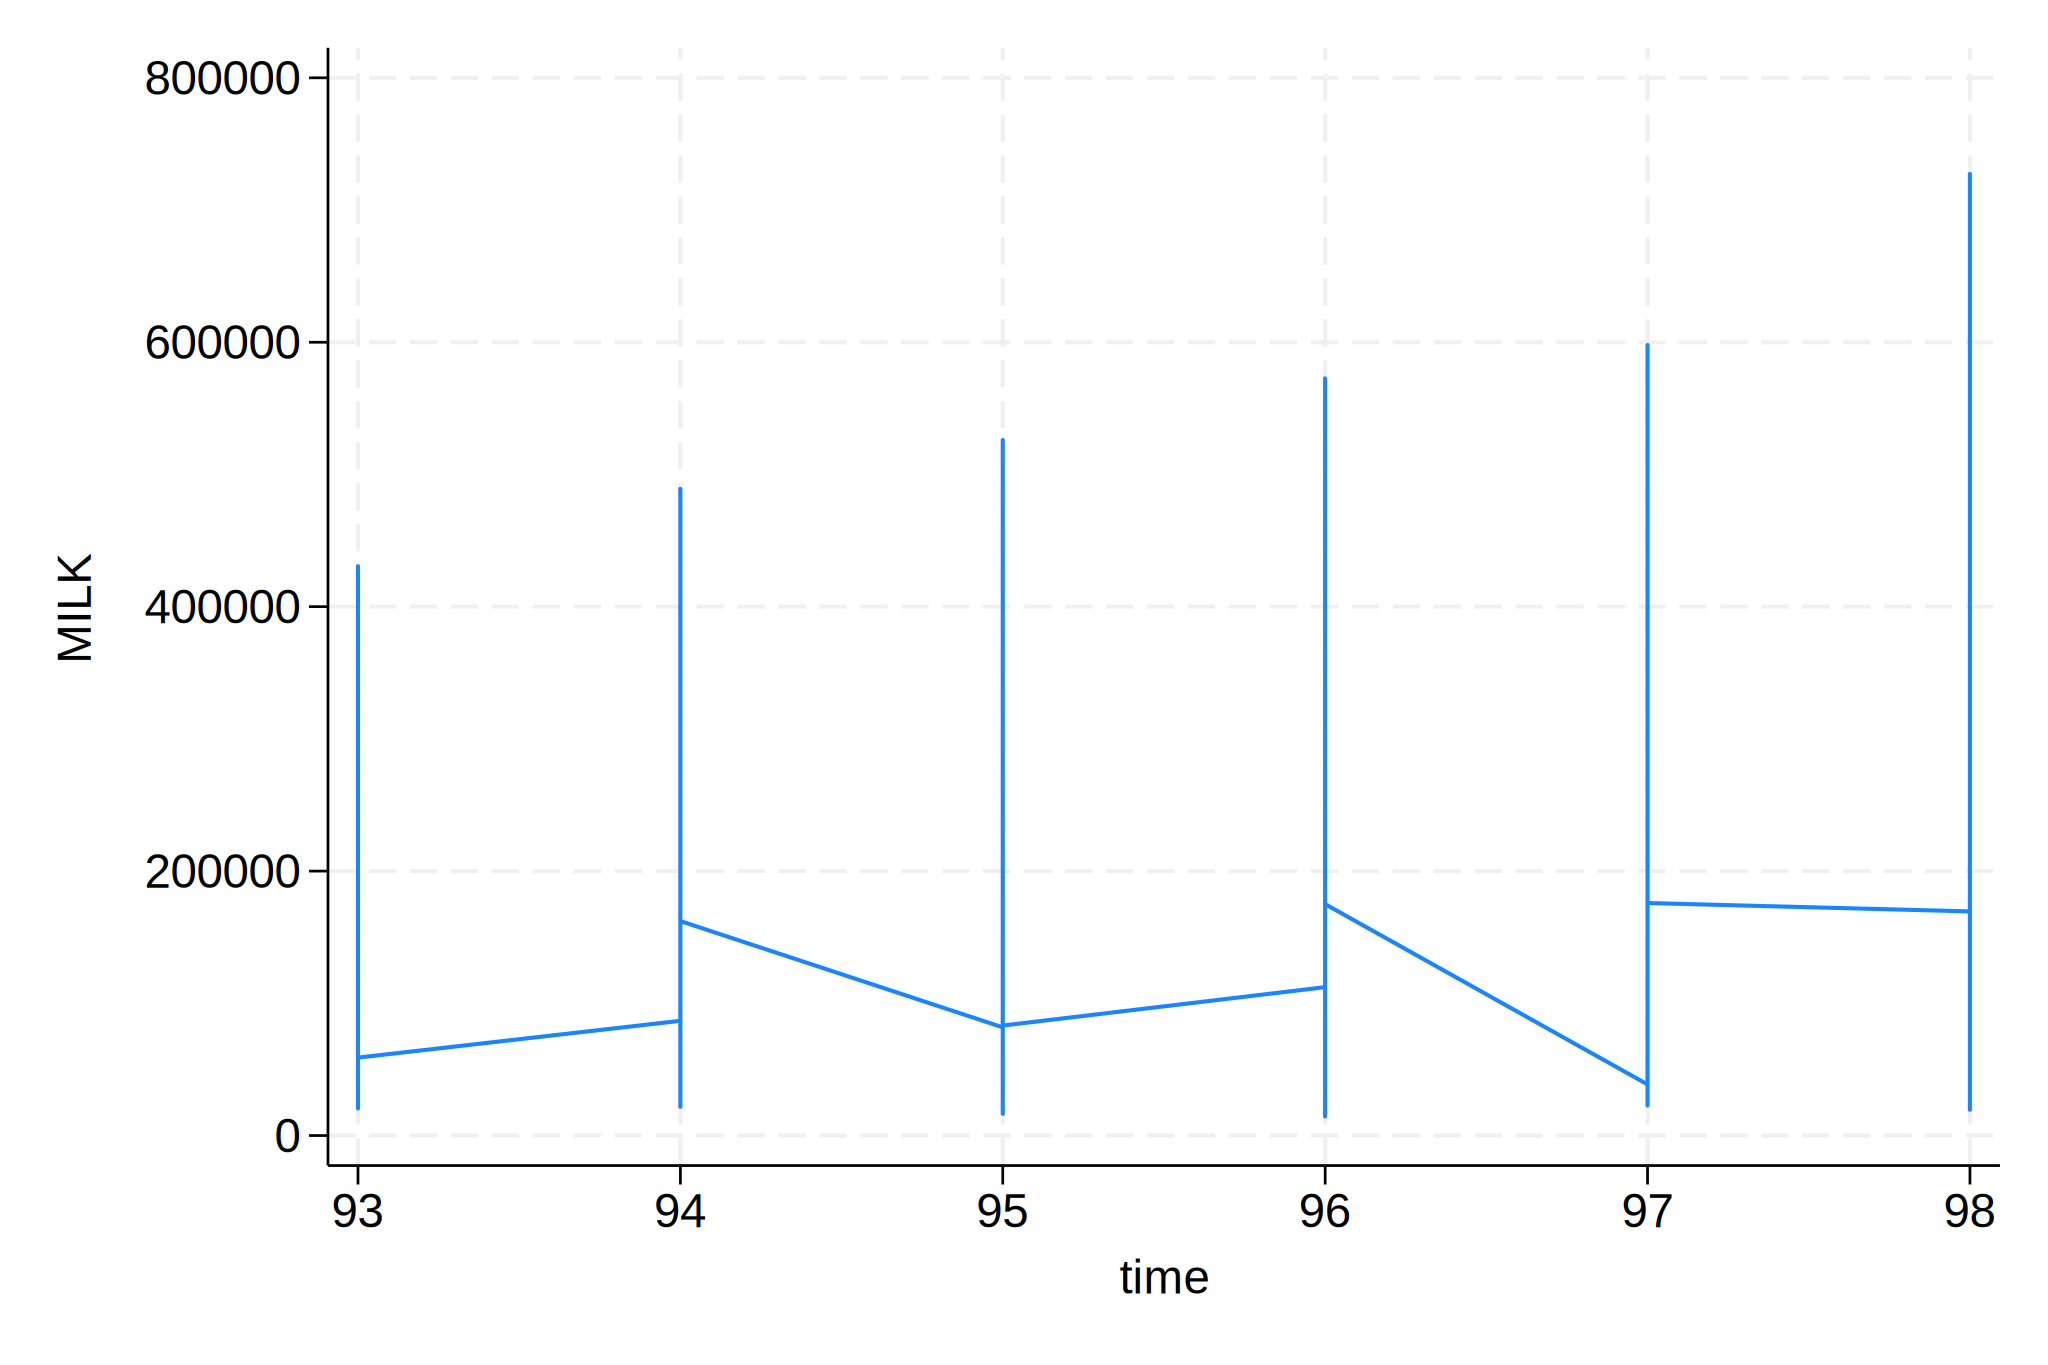

In [19]:
%stata tsline milk

Parece que la gráfica de la producción de leche muestra saltos significativos entre años, lo que sugiere una posible variabilidad temporal considerable. Esto puede estar relacionado con factores estacionales o con características específicas de las granjas, como ciclos de producción o cambios en la cantidad de recursos disponibles para la producción de leche a lo largo del tiempo.

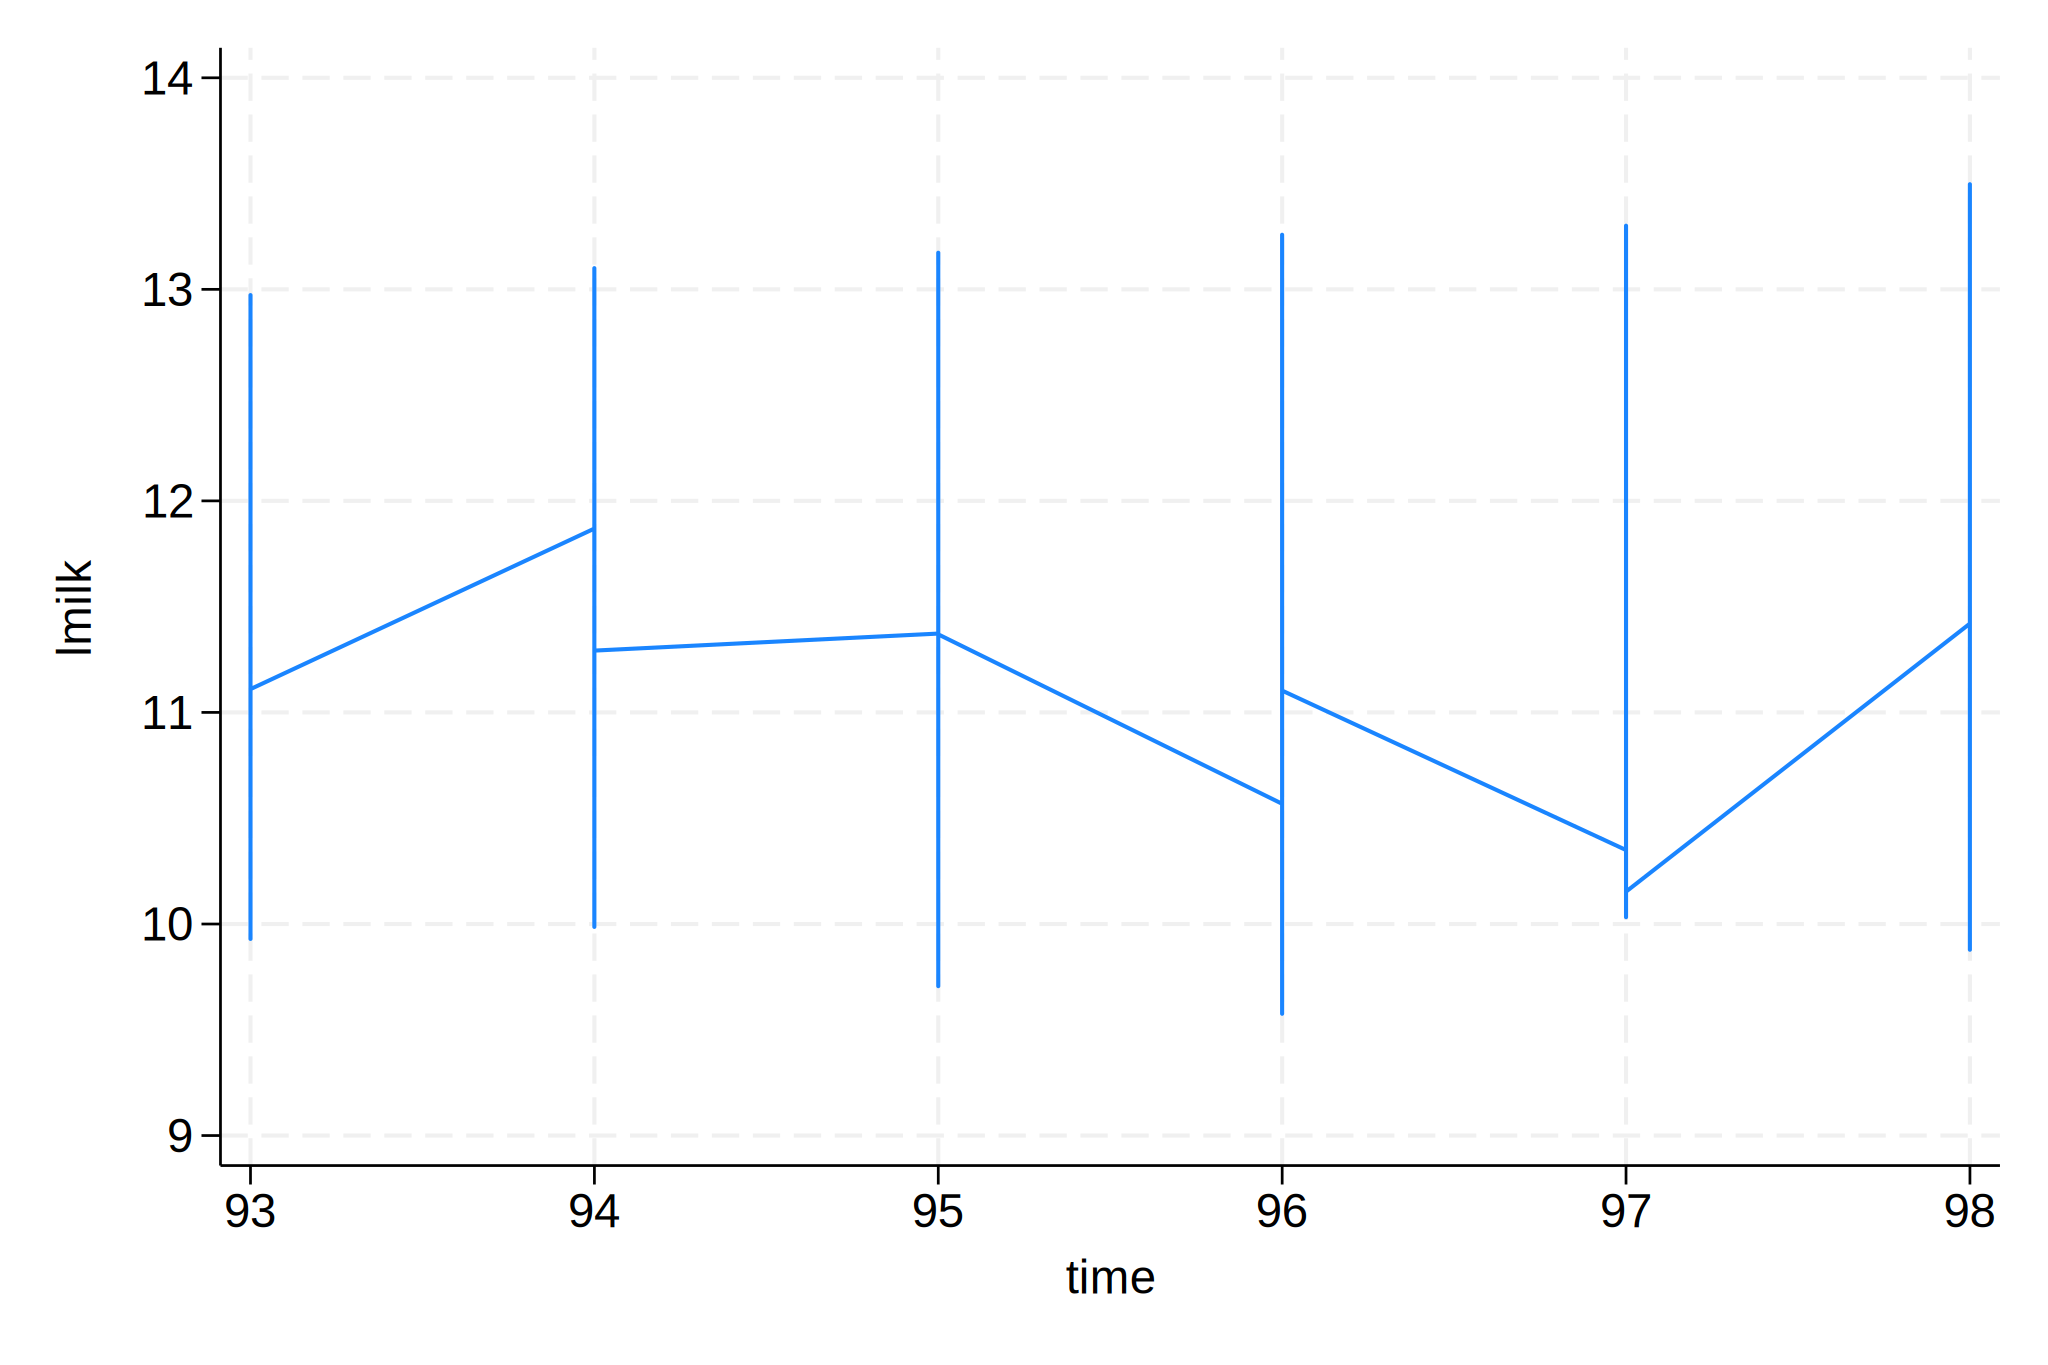

(247 missing values generated)


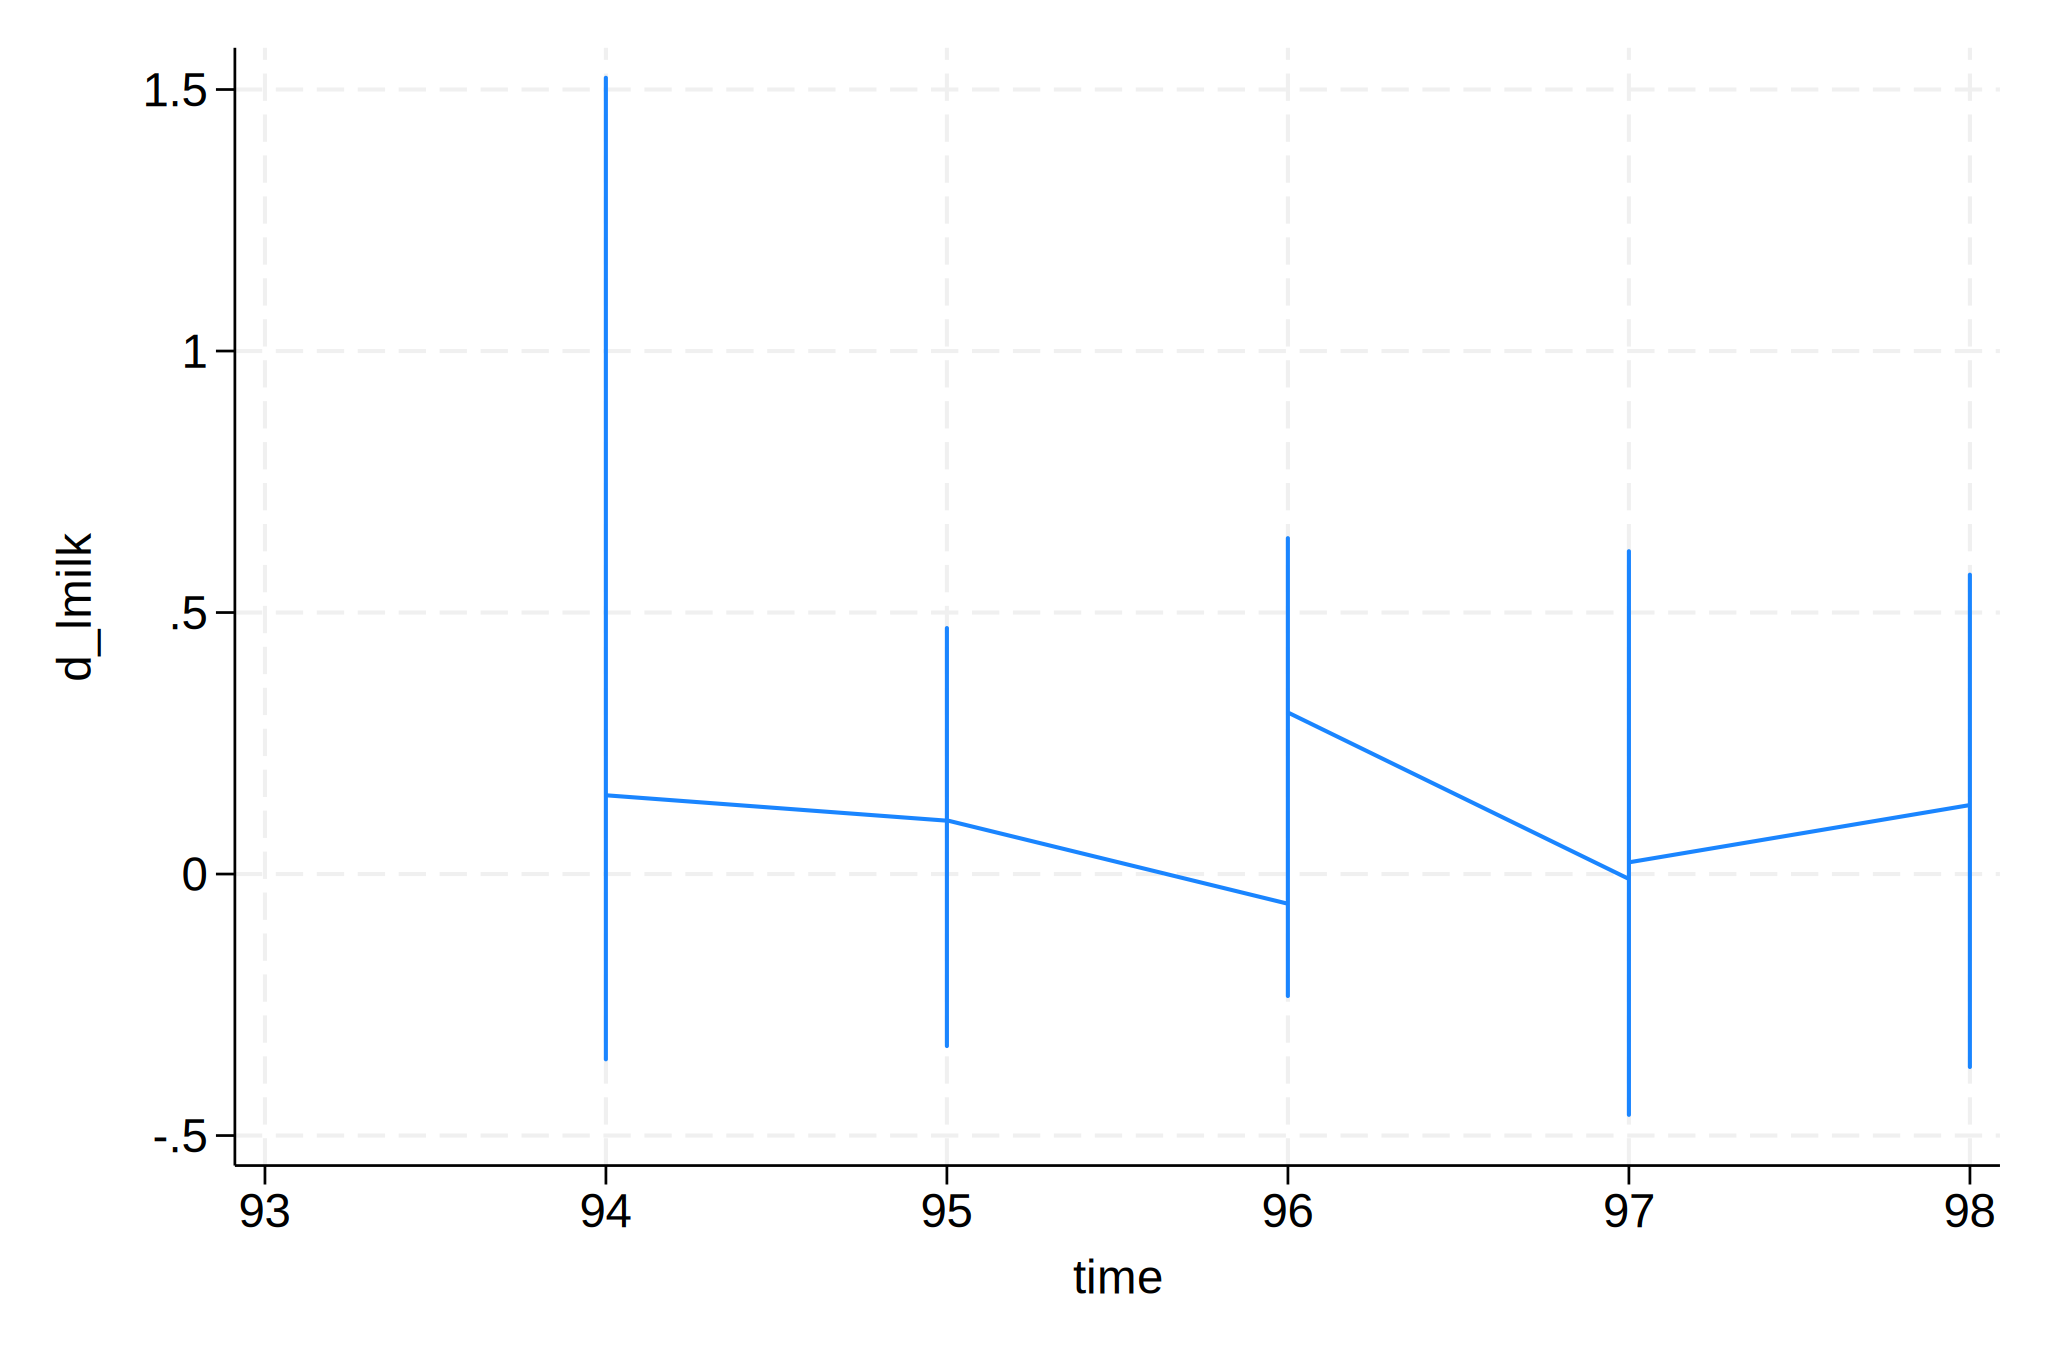

In [20]:
%stata gen lmilk = log(milk)
%stata tsline lmilk
%stata gen d_lmilk = lmilk - L1.lmilk
%stata tsline d_lmilk

In [22]:
%stata list farm time milk lmilk d_lmilk in 1/10


     +---------------------------------------------+
     | farm   time     milk      lmilk     d_lmilk |
     |---------------------------------------------|
  1. |    1     93    73647   11.20704           . |
  2. |    1     94    91260   11.42147    .2144289 |
  3. |    1     95   118498   11.68265    .2611837 |
  4. |    1     96   111454   11.62137   -.0612841 |
  5. |    1     97   110419   11.61204   -.0093298 |
     |---------------------------------------------|
  6. |    1     98   131197   11.78446    .1724176 |
  7. |    2     93   118149    11.6797           . |
  8. |    2     94   127742   11.75777    .0780659 |
  9. |    2     95   146490   11.89471    .1369448 |
 10. |    2     96   163434   12.00416    .1094522 |
     +---------------------------------------------+


In [28]:
%stata regress d_lmilk L.d_lmilk



      Source |       SS           df       MS      Number of obs   =       988
-------------+----------------------------------   F(1, 986)       =      1.98
       Model |   .03269828         1   .03269828   Prob > F        =    0.1592
    Residual |  16.2470384       986  .016477727   R-squared       =    0.0020
-------------+----------------------------------   Adj R-squared   =    0.0010
       Total |  16.2797367       987  .016494161   Root MSE        =    .12837

------------------------------------------------------------------------------
     d_lmilk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     d_lmilk |
         L1. |  -.0421196   .0298999    -1.41   0.159    -.1007944    .0165552
             |
       _cons |   .0725109    .004713    15.39   0.000     .0632622    .0817596
------------------------------------------------------------------------------


In [27]:
%stata regress d_lmilk L.d_lmilk L2.d_lmilk


      Source |       SS           df       MS      Number of obs   =       741
-------------+----------------------------------   F(2, 738)       =      3.25
       Model |  .111984792         2  .055992396   Prob > F        =    0.0395
    Residual |  12.7332741       738  .017253759   R-squared       =    0.0087
-------------+----------------------------------   Adj R-squared   =    0.0060
       Total |  12.8452589       740  .017358458   Root MSE        =    .13135

------------------------------------------------------------------------------
     d_lmilk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     d_lmilk |
         L1. |  -.0606172   .0393082    -1.54   0.123    -.1377864    .0165521
         L2. |   .0688947   .0348975     1.97   0.049     .0003845    .1374048
             |
       _cons |    .063215   .0064188     9.85   0.000     .0506138    .0758162
--------------------

In [ ]:
%stata bysort farm: ac